# 폭력/비폭력 분류

In [ ]:
pip install tensorflow

In [106]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import * 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os 

In [107]:
# 폭력 이미지 소스 확인
path = "/content/drive/MyDrive/ttproject/Sequential/폭력성/폭력"
file_count = len(os.listdir(path))
print("Number of files:", file_count)

Number of files: 500


In [108]:
# 비폭력 이미지 소스 확인
path = "/content/drive/MyDrive/ttproject/Sequential/폭력성/비폭력"
file_count = len(os.listdir(path))
print("Number of files:", file_count)

Number of files: 500


In [109]:
import shutil

# 원본 폴더 경로
violence_folder_path = "/content/drive/MyDrive/ttproject/Sequential/폭력성/폭력"
nonviolence_folder_path = "/content/drive/MyDrive/ttproject/Sequential/폭력성/비폭력"

# 새로운 폴더의 경로
new_folder_path = "/content/drive/MyDrive/ttproject/Sequential/폭력성/폭력train"

# 폴더 생성
os.makedirs(new_folder_path, exist_ok=True)

# 폭력 폴더의 이미지 파일 이동
violence_files = os.listdir(violence_folder_path)
for i, file in enumerate(violence_files):
    original_file_path = os.path.join(violence_folder_path, file)
    new_file_name = f"폭력{i+1:03d}{os.path.splitext(file)[1]}"  # 원본 파일의 확장자를 유지하도록 수정
    new_file_path = os.path.join(new_folder_path, new_file_name)
    shutil.copy2(original_file_path, new_file_path)

# 비폭력 폴더의 이미지 파일 이동
nonviolence_files = os.listdir(nonviolence_folder_path)
for i, file in enumerate(nonviolence_files):
    original_file_path = os.path.join(nonviolence_folder_path, file)
    new_file_name = f"비폭력{i+1:03d}{os.path.splitext(file)[1]}"  # 원본 파일의 확장자를 유지하도록 수정
    new_file_path = os.path.join(new_folder_path, new_file_name)
    shutil.copy2(original_file_path, new_file_path)

In [110]:
# 경로 설정 - 폭력/비폭력 trainset, 각각 500개씩 합쳐져있는 폴더
path = "/content/drive/MyDrive/ttproject/Sequential/폭력성/폭력train"
files = os.listdir(path)

for file in files:
    if file == ".DS_Store":
        os.remove(os.path.join(dpath, file))

In [111]:
# 데이터 형상 관련 상수 정의 
IMAGE_WIDTH = 216
IMAGE_HEIGHT = 216
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [112]:
# 학습 데이터 준비 
filenames = os.listdir(path)

df = pd.DataFrame(
    {"filename":sorted(filenames),
    "category":1}
)      
df

,filename,category
0,비폭력001.jpg,1
1,비폭력002.jpg,1
2,비폭력003.jpg,1
3,비폭력004.jpg,1
4,비폭력005.jpg,1
...,...,...
995,폭력496.jpg,1
996,폭력497.jpg,1
997,폭력498.jpg,1
998,폭력499.jpg,1


In [113]:
# 비폭력=0, 폭력=1로 정답 레이블 (category) 생성
df.loc[:499, "category"] = 0

violence_rows = df[df["category"] == 1]
print(violence_rows)

           filename  category
500   폭력001.jpg         1
501   폭력002.jpg         1
502   폭력003.jpg         1
503   폭력004.jpg         1
504  폭력005.jpeg         1
..              ...       ...
995   폭력496.jpg         1
996   폭력497.jpg         1
997   폭력498.jpg         1
998   폭력499.jpg         1
999  폭력500.jpeg         1

[500 rows x 2 columns]


In [114]:
# 확인 
nonviolence_rows = df[df["category"] == 0]
print(nonviolence_rows)

df

            filename  category
0    비폭력001.jpg         0
1    비폭력002.jpg         0
2    비폭력003.jpg         0
3    비폭력004.jpg         0
4    비폭력005.jpg         0
..               ...       ...
495  비폭력496.jpg         0
496  비폭력497.jpg         0
497  비폭력498.jpg         0
498  비폭력499.jpg         0
499  비폭력500.jpg         0

[500 rows x 2 columns]


,filename,category
0,비폭력001.jpg,0
1,비폭력002.jpg,0
2,비폭력003.jpg,0
3,비폭력004.jpg,0
4,비폭력005.jpg,0
...,...,...
995,폭력496.jpg,1
996,폭력497.jpg,1
997,폭력498.jpg,1
998,폭력499.jpg,1


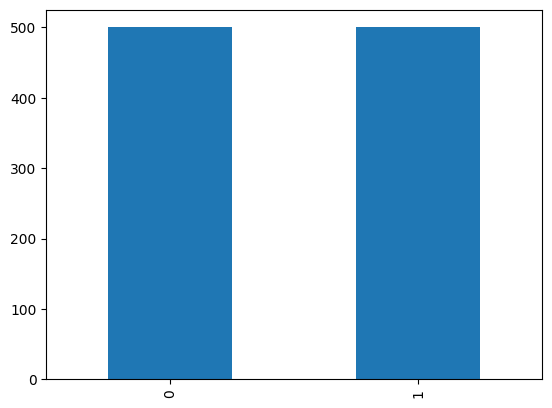

In [115]:
df['category'].value_counts().plot.bar()
plt.show()

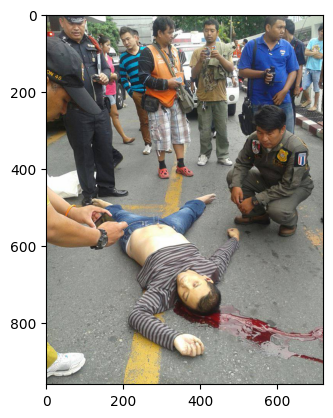

In [116]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# 샘플 이미지 불러오기
sample = random.choice(filenames)
img_path = os.path.join(path, sample)
image = load_img(img_path)
plt.imshow(image)

In [117]:
# 배치정규화(Batch Normalization): 신경망 입력 데이터를 평균 : 0 , 분산: 1로 정규화를 해서 학습이 잘 이루어지도록 하는 방법 

# 모델 생성

from keras.models import Sequential
from keras.layers import * 

In [118]:
# 레이어 1
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어 2 
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어3
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
# Fully Connected 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

In [119]:
# 모델 실행 옵션 
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 214, 214, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 214, 214, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 107, 107, 32)     0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 107, 107, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 105, 105, 64)      18496     
                                                                 
 batch_normalization_17 (Bat  (None, 105, 105, 64)    

In [120]:
# reduceLROnPlateau: 모델의 정확도가 향상되지 않는 경우 ㅡ learning rate (lr) 을 줄여주는 클래스
# : callback 함수의 일종, learning rate가 더이상 업데이트가 되지 않으면, 학습을 중단해라
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(
                        monitor= "val_accuracy", 
                        patience = 2, 
                        factor = 0.5, 
                        min_lr=0.0001,
                        verbose=1)
                        
callbacks = [earlystop, learning_rate_reduction]

In [121]:
# 이미지 제너레이터에서 class_mode = "categorical"로 지정하기 위해 컬럼 카테고리를 스트링으로 변경함. 
df['category']=df['category'].replace({0:'비폭력',1:"폭력"})
df

,filename,category
0,비폭력001.jpg,비폭력
1,비폭력002.jpg,비폭력
2,비폭력003.jpg,비폭력
3,비폭력004.jpg,비폭력
4,비폭력005.jpg,비폭력
...,...,...
995,폭력496.jpg,폭력
996,폭력497.jpg,폭력
997,폭력498.jpg,폭력
998,폭력499.jpg,폭력


In [122]:
# test, validate 데이터 분리
# 비율 7:3으로 조정
train_df, validate_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['category'])

train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [123]:
train_df['category'].value_counts()

폭력     350
비폭력    350
Name: category, dtype: int64

In [124]:
validate_df['category'].value_counts()

폭력     150
비폭력    150
Name: category, dtype: int64

In [125]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=8

# 트레이닝 데이터의 제너레이터 설정 
train_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1, 
        height_shift_range=0.1)
        
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    path,
    x_col = "filename", 
    y_col = "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )
    
validate_datagen=ImageDataGenerator(rescale=1./255)
# 검증이미지니까, 사진 그대로 쓰겠다. 

validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col= "filename",
    y_col= "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )

Found 700 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [126]:
# 샘플 데이터 확인
example_df=train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,category
0,비폭력472.jpg,비폭력


In [127]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    path,
                    x_col = "filename",
                    y_col = "category",
                    target_size = IMAGE_SIZE,
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


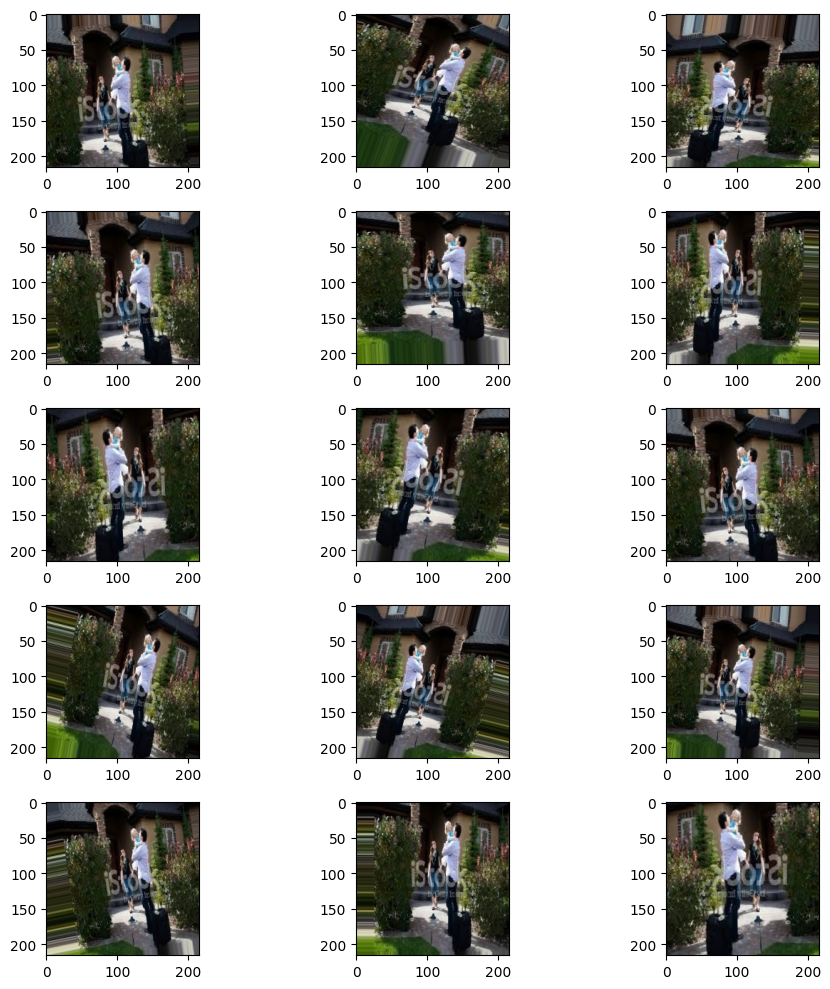

In [128]:
plt.figure(figsize=(10,10))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [129]:
# 가장 높은 성능의 모델을 저장
# 콜백값에 추가해서 EarlyStopping, ReduceLROnPlateau랑 같이 사용
# 그러면 학습 중에 성능 향상이 없는 경우 조기 종료하고, 학습률을 조정하면서, 가장 좋은 성능의 모델 가중치를 저장할 수 있다!
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [earlystop, learning_rate_reduction, checkpoint]

In [130]:
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

## 모델 학습

In [131]:
# 트레이닝
epochs = 50

history = model.fit(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,
    callbacks = callbacks,
)

# 모델 저장 
model.save("/content/drive/MyDrive/ttproject/Sequential/폭력성/seq_violence_model.h5")

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 1.1601 - accuracy: 0.6228
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to weights.h5
87/87 [==============================] - 47s 518ms/step - loss: 1.1601 - accuracy: 0.6228 - val_loss: 0.6583 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 0.8247 - accuracy: 0.7009
Epoch 2: val_accuracy did not improve from 0.62500
87/87 [==============================] - 42s 483ms/step - loss: 0.8247 - accuracy: 0.7009 - val_loss: 1.5085 - val_accuracy: 0.4966 - lr: 0.0010
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 0.7683 - accuracy: 0.6749
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: val_accuracy did not improve from 0.62500
87/87 [==============================] - 42s 485ms/step - loss: 0.7683 - accuracy: 0.6749 - val_loss: 1.3048 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 4/50
87/87 [======

## 트레이닝 모델 히스토리 시각화 

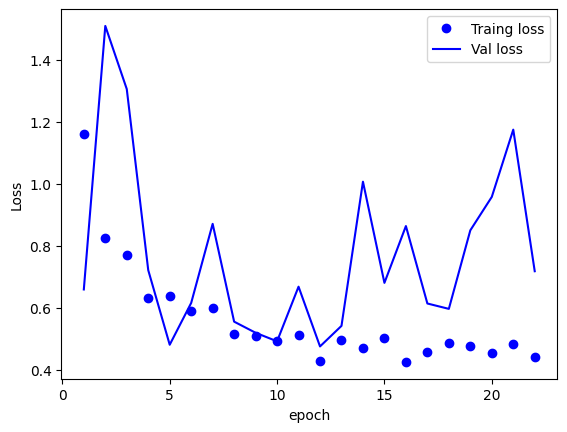

In [132]:
# 트레이닝 모델 히스토리 시각화 

historyDict=history.history

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

%matplotlib inline
epo = range(1, len(acc)+1)
plt.plot(epo, loss, 'bo', label="Traing loss")
plt.plot(epo, val_loss, 'b', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

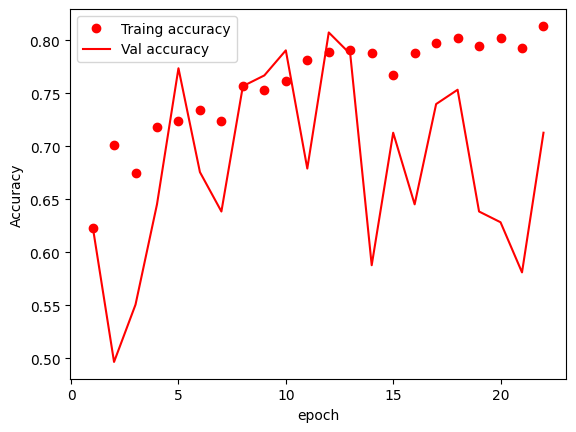

In [133]:
%matplotlib inline
plt.plot(epo, acc, 'ro', label="Traing accuracy")
plt.plot(epo, val_acc, 'r', label="Val accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 과적합 확인

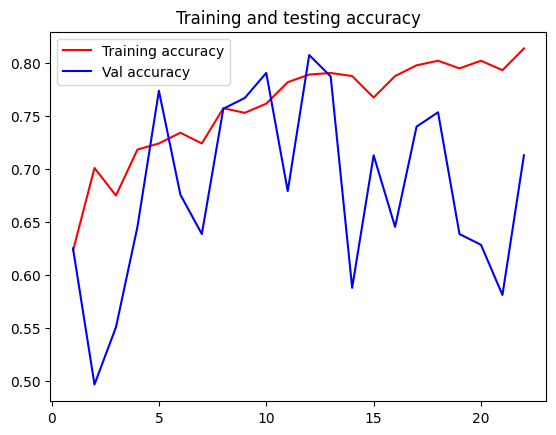

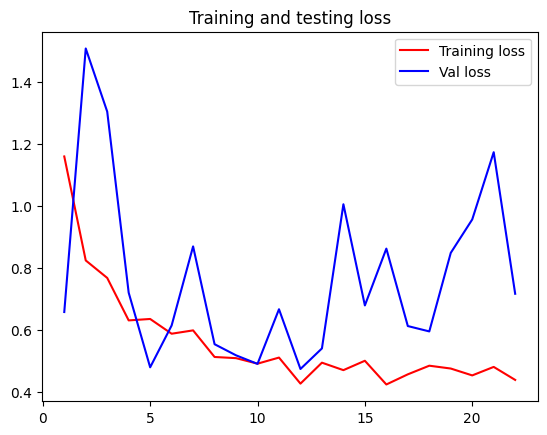

In [134]:
# 과적합 확인용
from matplotlib import pyplot as plt

plt.plot(epo, acc, 'r', label='Training accuracy')
plt.plot(epo, val_acc, 'b', label='Val accuracy')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epo, loss, 'r', label='Training loss')
plt.plot(epo, val_loss, 'b', label='Val loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

### 최종 모델 

- Epoch 12

- accuracy: 0.7890 
- val_accuracy: 0.8074 
- loss: 0.4273 
- val_loss: 0.4746 

- lr: 1.2500e-04